# CODE SUPPORT

### Imports and settings

In [38]:
# Data extraction
from ucimlrepo import fetch_ucirepo

# Default
import pandas as pd
import numpy as np
import warnings

# Data viz
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
warnings.filterwarnings('ignore')

### Helper Functions

In [4]:
def uci_heart_data():
    '''
        Downloads dataset from the UCI Repository: Heart Disease.

        Parameters:
            None.
        
        Returns:
            DataFrame: heart disease dataset.
    '''
    heart_disease = fetch_ucirepo(name='Heart Disease')

    df_features = heart_disease.data.features
    df_target = heart_disease.data.targets
    df_full = pd.concat([df_features, df_target], axis=1)
    
    return df_full


#

# 0 BUSINESS UNDERSTANDING

### CRISP for Data Science

This is the methodology I use in my projects.

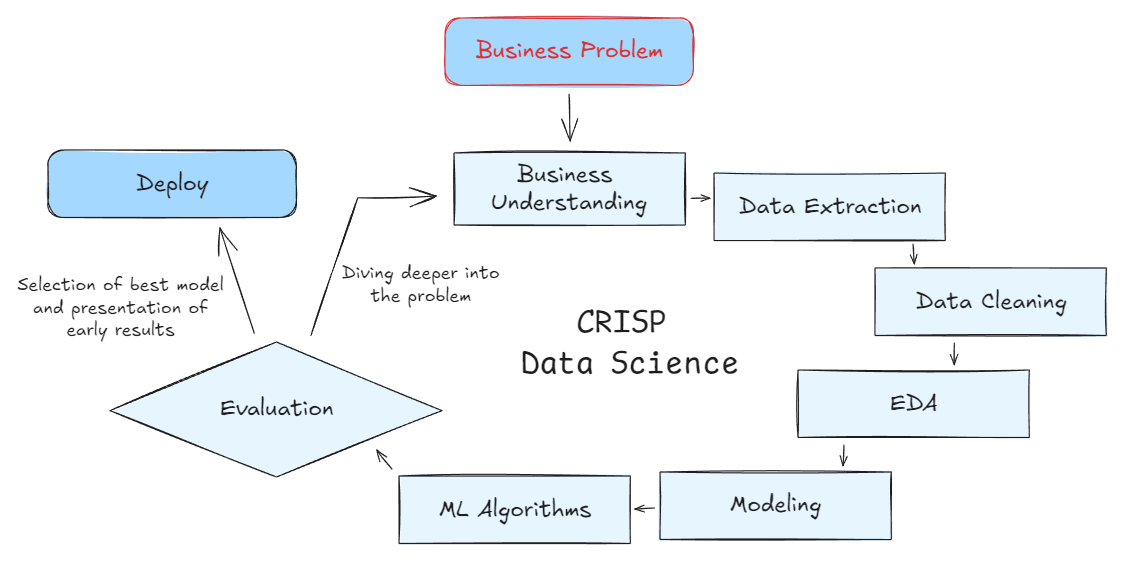

In [5]:
# Loading crisp img
img = Image.open('img/crisp.png')

# Show
display(img)

### Understanding the Problem

Then we begin tackling the problem by understanding it.

Objective of this study:
    - Supporting the development of a heart disease prevention system!

My job as a Data Scientist is to create a predictive model to identify patients more likely to develop heart diseases.


Dataset available in the URL from UC Irvine (UCI) ML Repository: https://archive.ics.uci.edu/ml/datasets/heart+disease.
It's made of 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach.

### Understanding the Data

As I don't have support from a medical team, my decisions are solely made out of my dataset limited interpretation.

Below, we can see a table with the variables information summary, taken directly from the UCI ML Repository.

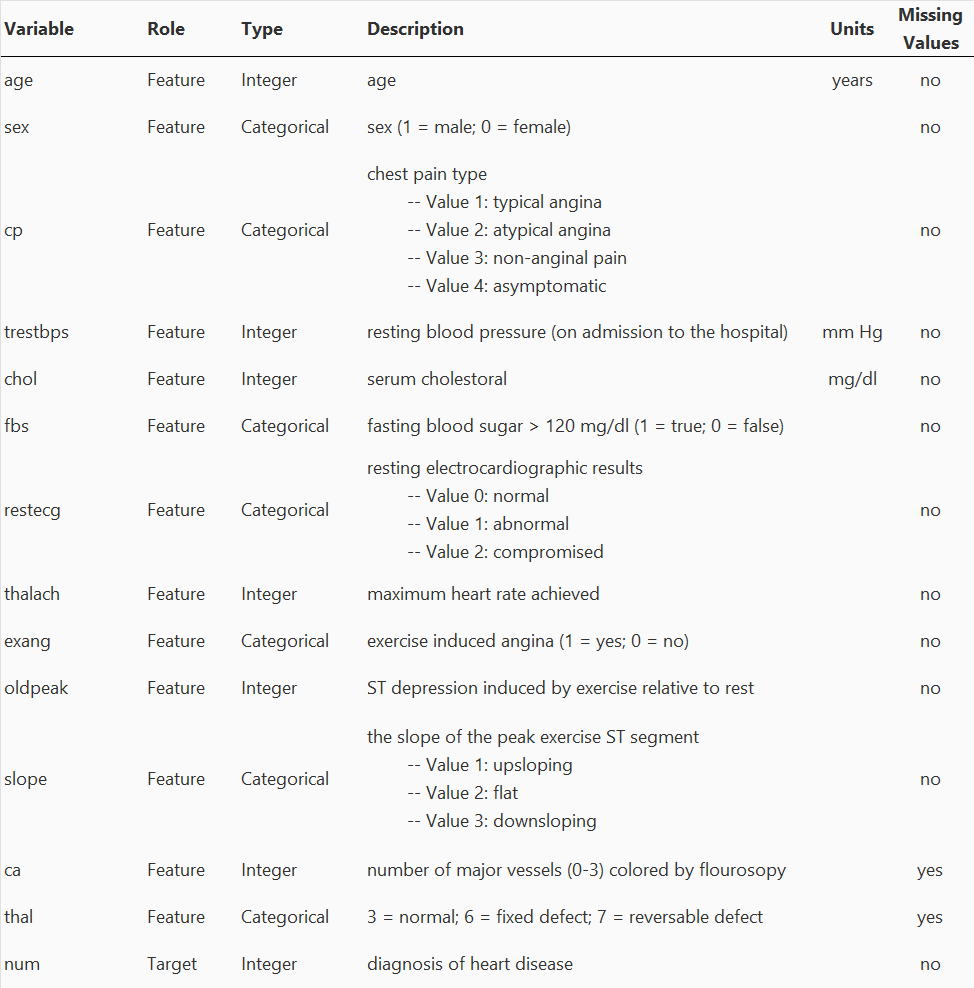

In [6]:
# Loading data_features img
img = Image.open('img/dataset_variables.png')

# Show
display(img)

The Target feature also have this extra info:

num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

Because we have the Target feature, it's possible to use supervised models to predict whether or not new patients are prone to heart diseases.

The next steps are Data Extraction and Data Cleaning. We can better understand the data he have by diving into it.

# 1 DATA EXTRACTION

In [7]:
# Downloading the dataset from UCI.
df1 = uci_heart_data()

# 2 DATA CLEANING

In [8]:
# Now we begin to understand how the dataset was built in more depth.
df2 = df1.copy()

### 2.1 Data Description

In [9]:
# Just taking a look at the dataframe.
df2.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1


In [10]:
# Checking dataframe size.
print( 'Rows: {}'.format( df2.shape[0] ) )
print( 'Cols: {}'.format( df2.shape[1] ) )

Rows: 303
Cols: 14


In [11]:
# Displaying information about variables types and missing values.
type_value_analysis = pd.concat(
    [df2.dtypes, df2.isna().sum()], 
    axis=1, 
    keys=['Data Types', 'Missing Values'])
print(type_value_analysis)

         Data Types  Missing Values
age           int64               0
sex           int64               0
cp            int64               0
trestbps      int64               0
chol          int64               0
fbs           int64               0
restecg       int64               0
thalach       int64               0
exang         int64               0
oldpeak     float64               0
slope         int64               0
ca          float64               4
thal        float64               2
num           int64               0


### 2.2 Missing Values

In [12]:
# Trying to understand the missing values.
df2[(df2['ca'].isna()) | (df2['thal'].isna())]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [13]:
# I don't have any other information that could help determine the missing values 
# for 'ca' (flouroscopy result) or 'thal' (whatever this is). 
# 
# The decision here is to drop them. It's just 2.3% of our dataset, we'll survive.
df2 = df2.dropna()

### 2.3 Data Types

In [14]:
# We have to take a look in the variables with data type float64, as the 
# int64 alreary have their values determined by the nature of its type.
# 
# These are 'oldpeak', 'ca' and 'thal'. Let's check their values. 
# 
# P.S.: UCI Repository says that 'oldpeak' and 'ca' are integer and 'thal' 
# is categorical.
unique_values_dict = {
    'oldpeak': list(df2['oldpeak'].unique()),
    'ca': list(df2['ca'].unique()),
    'thal': list(df2['thal'].unique())
}

for i in unique_values_dict:
    print('{}: {}'.format(i, unique_values_dict[i]))

oldpeak: [2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0.0, 0.5, 1.6, 1.0, 1.2, 0.2, 1.8, 3.2, 2.4, 2.0, 2.5, 2.2, 2.8, 3.0, 3.4, 6.2, 4.0, 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3, 4.4]
ca: [0.0, 3.0, 2.0, 1.0]
thal: [6.0, 3.0, 7.0]


In [15]:
# As we can see, 'ca' and 'thal' can be stored as integer. But, contrary to 
# the UCI recommendation, 'oldpeak' is indeed float.
variables_to_integer = ['ca', 'thal']

for i in variables_to_integer:
    df2[i] = df2[i].astype('int64')

### 2.4 Identifying Categorical and Numerical Data

In [ ]:
# Let's display unique values for each variable. Then we can decide on
# the nature of the data attributes.
attributes = list(df2.columns)
attributes_dict = {}

for att in attributes:
    attributes_dict[att] = list(df2[att].unique())

for i, j in attributes_dict.items():
    print('{}: {}'.format(i, j))

In [23]:
# The values for 'num' are not as expected from the data description from UCI.
# As we should have only 0 or 1, for False and True.

In [17]:
# Complete list of attributes:
attributes = list(df2.columns)

# For the numerical attributes, we can identify:
num_attributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# And for the categorical ones, we have:
cat_attributes = [att for att in attributes if att not in num_attributes]

### 2.5 Adjusting Values

In [25]:
# As we saw, 'num' values are not as expected. We can follow 
# with 0 as 0, but 1, 2, 3, 4 as 1. 
# If I'd take a guess, it may identify from which of the four
# databases these positives come from.
df2[df2['num'] > 0] = 1

# 3 EXPLORATORY DATA ANALYSIS

In [28]:
# It's adventure time.
df3 = df2.copy()

### 3.1 Descriptive Statistical Analysis

#### 3.1.2 Numerical Attributes

In [37]:
# Central Tendency
ct1 = pd.DataFrame( df3[num_attributes].apply( np.mean ) ).T
ct2 = pd.DataFrame( df3[num_attributes].apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( df3[num_attributes].apply( np.std ) ).T
d2 = pd.DataFrame( df3[num_attributes].apply( min ) ).T
d3 = pd.DataFrame( df3[num_attributes].apply( max ) ).T
d4 = pd.DataFrame( df3[num_attributes].apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( df3[num_attributes].apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( df3[num_attributes].apply( lambda x: x.kurtosis() ) ).T

summary = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
summary.columns = [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

summary

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,1.0,76.0,75.0,28.821549,41.0,26.675980,0.047415,-1.761414
1,trestbps,1.0,180.0,179.0,70.050505,106.0,65.008527,-0.051353,-1.866154
2,chol,1.0,564.0,563.0,131.636364,182.0,127.120992,0.189497,-1.299222
3,thalach,1.0,202.0,201.0,85.892256,125.0,79.780181,-0.070251,-1.909490
4,oldpeak,0.0,4.2,4.2,0.783838,1.0,0.609693,1.026563,4.105766


In [ ]:
# In general, we have:
#   - mean close to median, which may indicate small presence of outliers;
#   - high standard deviation, meaning high dispersion of points compared to the mean value;
#   - low skewness (except for oldpeak), indicating high simmetry in data distribution;
#   - aligning to the high std, we have negative kutosis: a flatten curve of distribution, 
# except for 'oldpeak', that shows a sharp peak, probably concentrating values in the median. 

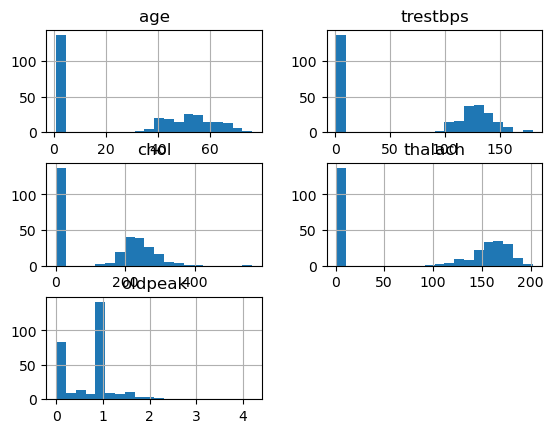

In [56]:
df3[num_attributes].hist( bins=20 );

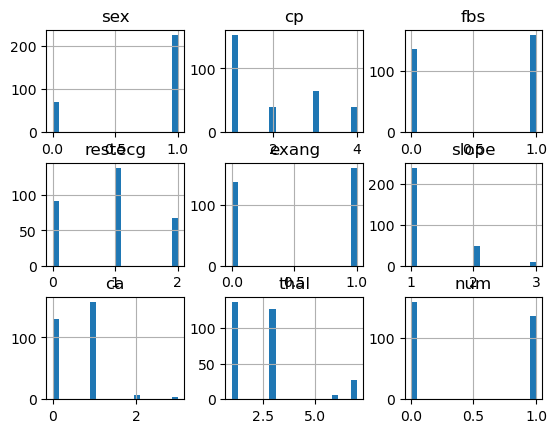

In [57]:
df3[cat_attributes].hist( bins=20 );

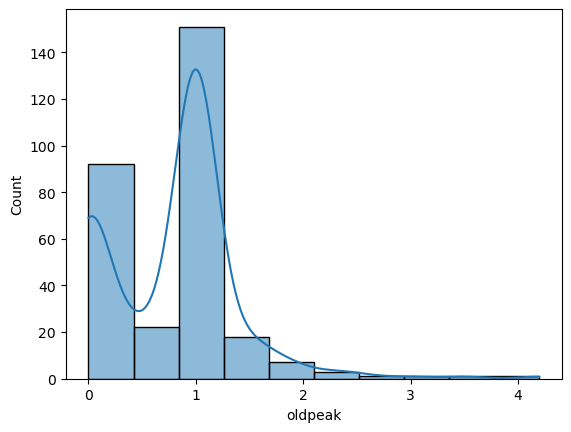

In [54]:
sns.histplot(df3['oldpeak'], kde=True, bins=10);